In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
filePath = "data/vessel_data_cleaned.csv"
vessel_df = pd.read_csv(filePath)

In [3]:
vessel_df.head(10)

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,0,374577000,8/15/2023 0:00,24.27657,-80.45479,14.5,237.6,235,MALENA,IMO9718210,3FGW7,70,0.0,292,38.964596,12.0,80.0,A
1,1,413171000,8/15/2023 0:00,30.87777,-127.06401,17.7,118.0,117,XIN FEI ZHOU,IMO9337937,BPKD,70,0.0,335,42.000000,14.7,74.0,A
2,2,440189000,8/15/2023 0:00,37.32868,-125.91110,13.8,126.0,126,SM YANTIAN,IMO9312949,D7FS,70,0.0,304,40.000000,13.3,70.0,A
3,3,366938730,8/15/2023 0:00,42.30660,-83.08243,5.5,45.4,44,INDIANA HARBOR,IMO7514701,WXN3191,70,0.0,304,32.000000,10.4,70.0,A
4,4,316001698,8/15/2023 0:00,43.18639,-79.19821,4.0,160.8,167,ALGOMA TRANSPORT,IMO7711737,VCLX,70,0.0,222,23.000000,9.2,70.0,A
5,5,374993000,8/15/2023 0:00,20.29028,-111.12873,15.0,311.6,310,G. SPIRIT,IMO9797876,3EEW9,80,0.0,225,36.000000,11.6,80.0,A
6,6,416497000,8/15/2023 0:00,36.18500,-122.67716,14.5,276.1,275,EVER LUNAR,IMO9629093,BKKF,70,0.0,334,45.000000,14.2,74.0,A
7,7,229393000,8/15/2023 0:00,27.99034,-118.51484,18.8,127.4,127,CMA CGM BALI,IMO9867827,9HA5482,71,0.0,366,51.000000,15.0,71.0,A
8,8,636020860,8/15/2023 0:00,28.14039,-92.81649,15.5,143.0,146,VIVIRT CITY LNG,IMO9895238,5LBB6,81,0.0,299,46.000000,11.3,81.0,A
9,9,538010080,8/15/2023 0:00,29.25913,-94.46640,4.9,246.1,244,FREEPORT STAR,IMO9933212,V7A5567,80,0.0,250,44.000000,10.2,80.0,A


In [4]:
vessel_df.shape

(90154, 18)

In [5]:
vessel_df["BaseDateTime"]

0        8/15/2023 0:00
1        8/15/2023 0:00
2        8/15/2023 0:00
3        8/15/2023 0:00
4        8/15/2023 0:00
              ...      
90149    9/7/2023 18:00
90150    9/7/2023 18:00
90151    9/7/2023 18:00
90152    9/7/2023 18:00
90153    9/7/2023 18:00
Name: BaseDateTime, Length: 90154, dtype: object

In [6]:
missing_values = vessel_df.isnull().sum()
missing_values

Unnamed: 0          0
MMSI                0
BaseDateTime        0
LAT                 0
LON                 0
SOG                 0
COG                 0
Heading             0
VesselName          0
IMO                 0
CallSign            0
VesselType          0
Status              0
Length              0
Width               0
Draft               0
Cargo               0
TransceiverClass    0
dtype: int64

In [7]:
vessel_df["Cargo"].value_counts()

Cargo
70.0     36757
80.0     24290
71.0     12220
79.0      4810
74.0      3617
89.0      3172
73.0       815
81.0       799
35.0       796
84.0       777
72.0       752
0.0        280
1.0        236
88.0       150
90.0       125
83.0       109
75.0       102
57.0        84
52.0        62
82.0        60
65.0        53
85.0        50
4.0         10
160.0       10
31.0         5
76.0         5
92.0         2
91.0         2
9.0          1
99.0         1
77.0         1
36.0         1
Name: count, dtype: int64

In [10]:
vessel_df.columns

Index(['Unnamed: 0', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')

In [11]:
vessel_df.dtypes

Unnamed: 0            int64
MMSI                  int64
BaseDateTime         object
LAT                 float64
LON                 float64
SOG                 float64
COG                 float64
Heading               int64
VesselName           object
IMO                  object
CallSign             object
VesselType            int64
Status              float64
Length                int64
Width               float64
Draft               float64
Cargo               float64
TransceiverClass     object
dtype: object

In [12]:
vessel_df.describe()

,Unnamed: 0,MMSI,LAT,LON,SOG,COG,Heading,VesselType,Status,Length,Width,Draft,Cargo
count,90154.000000,9.015400e+04,90154.000000,90154.000000,90154.000000,90154.000000,90154.000000,90154.00000,90154.000000,90154.000000,90154.000000,90154.000000,90154.000000
mean,45076.500000,4.267671e+08,35.170213,-97.121966,6.419765,185.353767,183.782306,73.91804,1.412328,270.372962,38.964596,12.005543,73.762939
std,26025.362421,1.427798e+08,7.754516,22.085795,7.109988,102.086102,105.438894,5.09373,2.193858,46.788678,8.729666,2.935977,8.686348
min,0.000000,2.050860e+08,10.733360,-165.054890,0.000000,0.000000,0.000000,70.00000,0.000000,201.000000,21.000000,0.000000,0.000000
25%,22538.250000,3.110573e+08,29.226700,-119.122400,0.000000,107.700000,100.000000,70.00000,0.000000,229.000000,32.000000,9.700000,70.000000
50%,45076.500000,3.718510e+08,33.744050,-93.869610,3.400000,182.000000,179.000000,70.00000,0.000000,259.000000,40.000000,12.000000,71.000000
75%,67614.750000,5.630669e+08,40.648877,-79.893447,12.400000,275.000000,272.000000,80.00000,1.000000,300.000000,45.000000,14.300000,80.000000
max,90153.000000,7.100330e+08,50.898700,145.887290,102.300000,360.000000,511.000000,89.00000,15.000000,667.000000,60.000000,23.300000,160.000000


In [13]:
vessel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90154 entries, 0 to 90153
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        90154 non-null  int64  
 1   MMSI              90154 non-null  int64  
 2   BaseDateTime      90154 non-null  object 
 3   LAT               90154 non-null  float64
 4   LON               90154 non-null  float64
 5   SOG               90154 non-null  float64
 6   COG               90154 non-null  float64
 7   Heading           90154 non-null  int64  
 8   VesselName        90154 non-null  object 
 9   IMO               90154 non-null  object 
 10  CallSign          90154 non-null  object 
 11  VesselType        90154 non-null  int64  
 12  Status            90154 non-null  float64
 13  Length            90154 non-null  int64  
 14  Width             90154 non-null  float64
 15  Draft             90154 non-null  float64
 16  Cargo             90154 non-null  float6

In [14]:
vessel_df['BaseDateTime'] = pd.to_datetime(vessel_df['BaseDateTime'])
vessel_df = vessel_df.sort_values(by=['MMSI', 'BaseDateTime']).reset_index(drop=True)  # Sort the data by vessel and timestamp
labels = []
cog_diffs = []

for i in range(1, len(vessel_df)):
    curr_vessel = vessel_df.loc[i, 'MMSI']
    prev_vessel = vessel_df.loc[i - 1, 'MMSI']
    time_diff = vessel_df.loc[i, 'BaseDateTime'] - vessel_df.loc[i - 1, 'BaseDateTime']

    if (curr_vessel == prev_vessel) and (time_diff <= pd.Timedelta('1D')):
        prev_cog = vessel_df.loc[i - 1, 'COG']
        curr_cog = vessel_df.loc[i, 'COG']
        cog_diff = abs(curr_cog - prev_cog)
        curr_sog = vessel_df.loc[i, 'SOG']

        cog_diffs.append(cog_diff)
        if curr_sog == 0:
            labels.append('stopped')
        elif abs(cog_diff - 180) <= 10:
            labels.append('turned around')
        elif cog_diff > 15:
            labels.append('veered off course')
        else:
            labels.append('stayed on course')
    else:
        labels.append('stayed on course')

if vessel_df.loc[0, 'SOG'] == 0:
    labels.insert(0, 'stopped')
else:
    labels.insert(0, 'stayed on course')

vessel_df['VesselPath'] = labels
vessel_df.head(25)

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass,VesselPath
0,1444,205086000,2023-08-01 00:00:00,28.57680,-116.36004,0.2,134.9,245,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.6,80.0,A,stayed on course
1,2039,205086000,2023-08-01 06:00:00,28.60823,-116.33214,8.8,338.9,335,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,veered off course
2,2526,205086000,2023-08-01 12:00:00,29.57781,-116.67535,10.7,345.0,344,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,stayed on course
3,2749,205086000,2023-08-01 18:00:00,30.50631,-116.96911,8.8,343.9,341,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,stayed on course
4,7644,205086000,2023-08-02 00:00:00,31.33209,-117.23504,7.9,346.0,342,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,stayed on course
5,8150,205086000,2023-08-02 06:00:00,32.05403,-117.47270,8.7,344.3,344,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,stayed on course
6,8346,205086000,2023-08-02 12:00:00,32.62476,-117.30820,4.1,77.9,82,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,veered off course
7,9019,205086000,2023-08-02 18:00:00,32.62361,-117.28591,0.0,164.0,282,DORIS,IMO9877781,ONKY,80,1.0,336,60.0,20.0,80.0,A,stopped
8,12340,205086000,2023-08-03 00:00:00,32.61147,-117.85517,11.0,268.7,268,DORIS,IMO9877781,ONKY,80,1.0,336,60.0,20.0,80.0,A,veered off course
9,12898,205086000,2023-08-03 12:00:00,32.20778,-119.79394,1.4,156.0,33,DORIS,IMO9877781,ONKY,80,0.0,336,60.0,20.0,80.0,A,veered off course


In [15]:
value_counts = vessel_df['VesselPath'].value_counts()
value_counts

VesselPath
stopped              31003
veered off course    30468
stayed on course     27311
turned around         1372
Name: count, dtype: int64

In [23]:
id_counts = vessel_df['MMSI'].value_counts()

count_one = 0
count_ten = 0
count_more_than_ten = 0

for count in id_counts:
    if count == 1:
        count_one += 1
    elif count < 10:
        count_ten += 1
    else:
        count_more_than_ten += 1

/var/folders/bf/zbss70kn2fq_0xbjk976nwx80000gn/T/ipykernel_99239/77525370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')


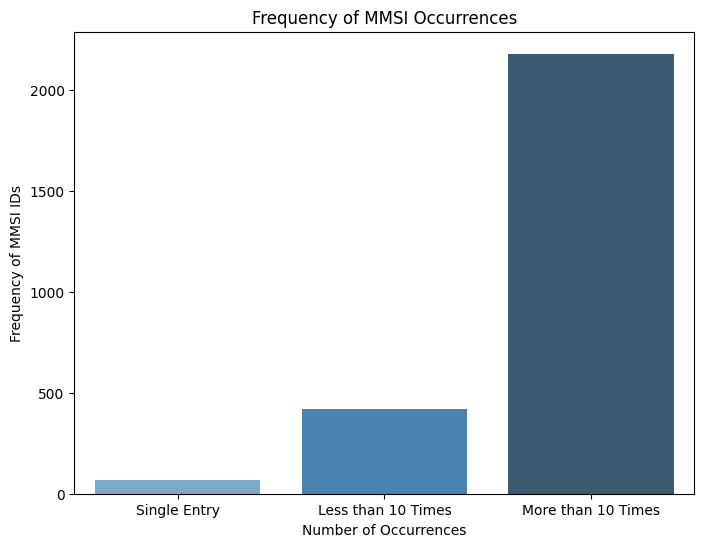

In [24]:
data = pd.DataFrame({
    'Category': ['Single Entry', 'Less than 10 Times', 'More than 10 Times'],
    'Count': [count_one, count_ten, count_more_than_ten]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')

plt.title('Frequency of MMSI Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency of MMSI IDs')
plt.show()

In [25]:
count_one

67

In [26]:
# Assuming 'vessel_df' is your DataFrame and 'MMSI' is the vessel identifier column
# Step 1: Group by the vessel identifier and count occurrences
vessel_counts = vessel_df['MMSI'].value_counts()

# Step 2: Filter out vessels that appear only once
vessels_to_keep = vessel_counts[vessel_counts > 1].index

# Step 3: Filter the original dataset to exclude single entry vessels
filtered_vessel_df = vessel_df[vessel_df['MMSI'].isin(vessels_to_keep)]

# Print the shape of the original and filtered DataFrame to verify
print(f"Original dataset shape: {vessel_df.shape}")
print(f"Filtered dataset shape: {filtered_vessel_df.shape}")

Original dataset shape: (90154, 19)
Filtered dataset shape: (90087, 19)


In [29]:
id_counts = filtered_vessel_df['MMSI'].value_counts()

count_one = 0
count_ten = 0
count_more_than_ten = 0

for count in id_counts:
    if count == 1:
        count_one += 1
    elif count < 10:
        count_ten += 1
    else:
        count_more_than_ten += 1

/var/folders/bf/zbss70kn2fq_0xbjk976nwx80000gn/T/ipykernel_99239/77525370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')


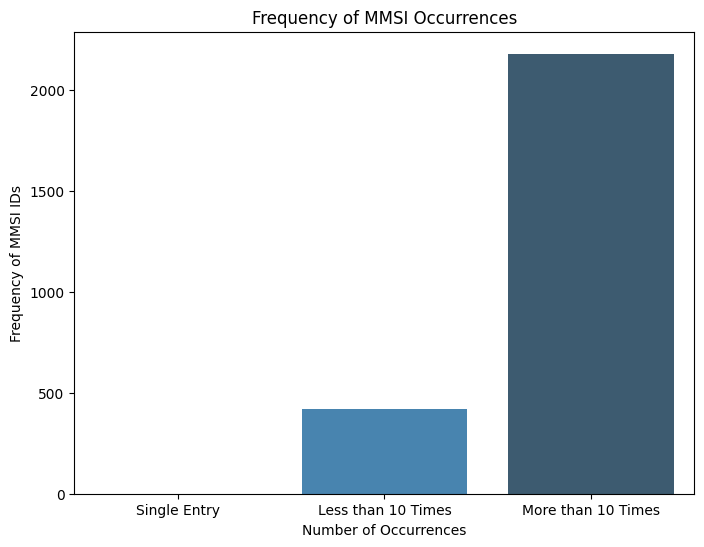

In [30]:
data = pd.DataFrame({
    'Category': ['Single Entry', 'Less than 10 Times', 'More than 10 Times'],
    'Count': [count_one, count_ten, count_more_than_ten]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')

plt.title('Frequency of MMSI Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency of MMSI IDs')
plt.show()